<a href="https://colab.research.google.com/github/HodaMemar/SemanticSimilarity_ClinicalNotes/blob/main/Analyze_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
import pickle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold

In [2]:
!pip install --upgrade xgboost

     |████████████████████████████████| 173.6 MB 7.3 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/csv 

/content/drive/MyDrive/csv


#MSE

In [ ]:
data_1=pd.read_csv('Sim_UMLSBert.csv')
data_2=pd.read_csv('Sim_USE.csv')
data_3=pd.read_csv('Sim_pubmed_bert.csv')
data_4=pd.read_csv('Sim_Sci_bert.csv')

data_5=pd.read_csv('Sim_Bio_clinical_bert.csv')

data_6=pd.read_csv('Sim_Blue_bert.csv')

data_7=pd.read_csv('Sim_BioBert.csv')

data_8=pd.read_csv('Sim_Bert.csv')

In [ ]:
data_3.describe()

,Unnamed: 0,i,k,MSE
count,4467.000000,4467.00000,4467.000000,4467.00000
mean,2233.000000,150001.60779,11.666667,0.12014
std,1289.656156,28566.64839,6.236794,0.15331
min,0.000000,100020.00000,5.000000,0.00000
25%,1116.500000,125227.00000,5.000000,0.00000
50%,2233.000000,151068.00000,10.000000,0.04000
75%,3349.500000,173894.00000,20.000000,0.16000
max,4466.000000,199999.00000,20.000000,1.00000


In [ ]:
data_1.describe()

,Unnamed: 0,i,k,MSE
count,4467.000000,4467.00000,4467.000000,4467.000000
mean,2233.000000,150001.60779,11.666667,0.113609
std,1289.656156,28566.64839,6.236794,0.145853
min,0.000000,100020.00000,5.000000,0.000000
25%,1116.500000,125227.00000,5.000000,0.000000
50%,2233.000000,151068.00000,10.000000,0.040000
75%,3349.500000,173894.00000,20.000000,0.160000
max,4466.000000,199999.00000,20.000000,1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


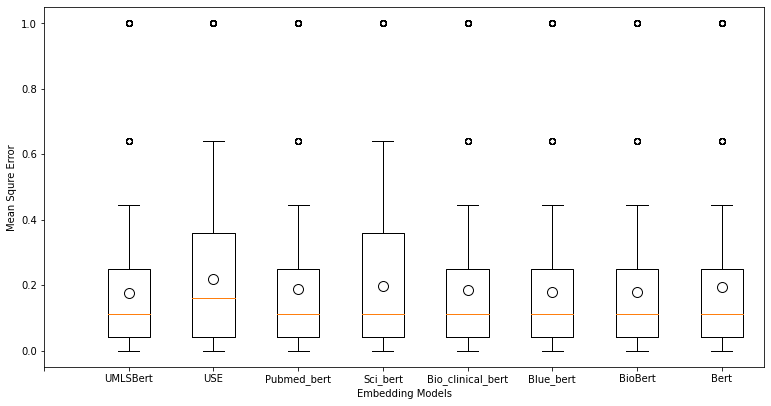

In [ ]:
 
d_1 = np.array(data_1[data_1['k']==5].MSE.tolist())
d_2 = np.array(data_2[data_2['k']==5].MSE.tolist())
d_3 = np.array(data_3[data_3['k']==5].MSE.tolist())
d_4 = np.array(data_4[data_4['k']==5].MSE.tolist())
d_5 = np.array(data_5[data_5['k']==5].MSE.tolist())
d_6 = np.array(data_6[data_6['k']==5].MSE.tolist())
d_7 = np.array(data_7[data_7['k']==5].MSE.tolist())
d_8 = np.array(data_8[data_8['k']==5].MSE.tolist())
data = [d_1, d_2,d_3,d_4,d_5,d_6,d_7,d_8]
 
fig = plt.figure(figsize =(10, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})


ticks = [0, 1, 2,3,4,5,6,7,8]
labels = ["", "UMLSBert", "USE", "Pubmed_bert", "Sci_bert","Bio_clinical_bert","Blue_bert","BioBert","Bert"]


plt.xticks(ticks, labels)

plt.xlabel("Embedding Models")
plt.ylabel("Mean Squre Error")
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


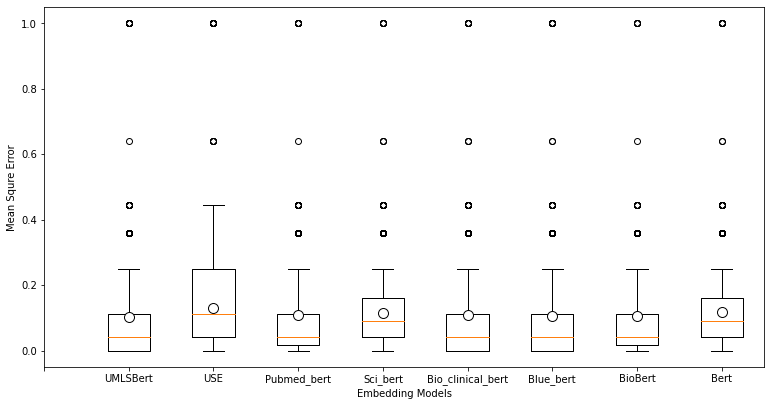

In [ ]:
 
d_1 = np.array(data_1[data_1['k']==10].MSE.tolist())
d_2 = np.array(data_2[data_2['k']==10].MSE.tolist())
d_3 = np.array(data_3[data_3['k']==10].MSE.tolist())
d_4 = np.array(data_4[data_4['k']==10].MSE.tolist())
d_5 = np.array(data_5[data_5['k']==10].MSE.tolist())
d_6 = np.array(data_6[data_6['k']==10].MSE.tolist())
d_7 = np.array(data_7[data_7['k']==10].MSE.tolist())
d_8 = np.array(data_8[data_8['k']==10].MSE.tolist())
data = [d_1, d_2,d_3,d_4,d_5,d_6,d_7,d_8]
 
fig = plt.figure(figsize =(10, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})


ticks = [0, 1, 2,3,4,5,6,7,8]
labels = ["", "UMLSBert", "USE", "Pubmed_bert", "Sci_bert","Bio_clinical_bert","Blue_bert","BioBert","Bert"]


plt.xticks(ticks, labels)

plt.xlabel("Embedding Models")
plt.ylabel("Mean Squre Error")
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


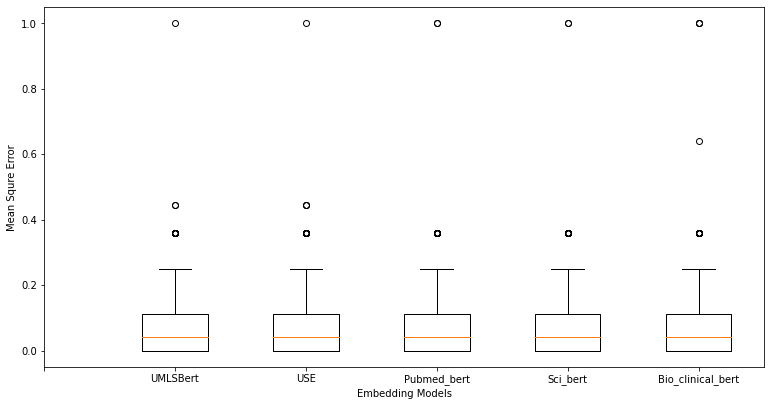

In [ ]:
 
d_1 = np.array(data_1[data_1['k']==20].MSE.tolist())
d_2 = np.array(data_2[data_2['k']==20].MSE.tolist())
d_3 = np.array(data_3[data_3['k']==20].MSE.tolist())
d_4 = np.array(data_4[data_4['k']==20].MSE.tolist())
d_5 = np.array(data_5[data_5['k']==20].MSE.tolist())
data = [d_1, d_2,d_3,d_4,d_5]
 
fig = plt.figure(figsize =(10, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)


ticks = [0, 1, 2,3,4,5]
labels = ["", "UMLSBert", "USE", "Pubmed_bert", "Sci_bert","Bio_clinical_bert"]


plt.xticks(ticks, labels)

plt.xlabel("Embedding Models")
plt.ylabel("Mean Squre Error")
# show plot
plt.show()

#Phenotype

In [ ]:
df_labels=pd.read_csv('sebastian.csv')
df_labels.head()

,HADM_ID,SUBJECT_ID,chart_time,cohort,Obesity,Non_Adherence,Developmental_Delay_Retardation,Advanced_Heart_Disease,Advanced_Lung_Disease,Schizophrenia_Psychiatric,Alcohol_Abuse,Substance_Abuse,Chronic_Pain_Fibromyalgia,Chronic_Neurological_Dystrophies,Advanced_Cancer,Depression,Dementia,Unsure
0,118003,3644,118003,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,177830,97736,999999,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,185673,27694,999999,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,131938,16275,131938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,198999,4059,198999,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
ls_labels=[]
for i in range(len(df_labels[0:5])):
    print( df_labels.iloc[i, 0].tolist())
    print(''.join([str(elem) for elem in df_labels.iloc[i, 3:].tolist()]))


118003
100000000100100
177830
000000000001000
185673
000000000000100
131938
000000000000000
198999
100000100000100


In [ ]:
df_labels=pd.DataFrame(ls_labels,columns=["HADM_ID","Label"])
df_labels

,HADM_ID,Label
0,118003,
1,177830,
2,185673,
3,131938,
4,198999,
...,...,...
1605,154684,
1606,110974,
1607,160802,
1608,106955,


#Mortality

##Load Data

In [8]:
df_labels=pd.read_csv('Sepastian_Mortality.csv')
df_labels.head()

,HADM_ID,Mortality
0,118003,0
1,177830,0
2,185673,0
3,131938,0
4,198999,0


In [47]:
def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

In [20]:
fig = plt.figure(figsize=(10,10))
from sklearn.model_selection import KFold


FileName=['Embeddiing_UmlsBert_FullNote.csv','/content/drive/MyDrive/csv/Embeddiing_Doc2Vec_dm_0_TFIDF.csv',
          'Embeddiing_Doc2Vec_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_bio_clinical_TFIDF.csv',
          'Embeddiing_sci_bert_TFIDF.csv',
          'Embeddiing_pubmed_bert_TFIDF.csv',
          'Embeddiing_UmlsBert_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_blue_bert_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_BERT_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_Bio_bert_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_USE_TFIDF.csv']
ModelNames=[]  
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['Model', 'fpr','tpr','auc'])       
seed = 7
test_size = 0.33 
ls_metric=[]  

# KFold Cross Validation approach




for i in  FileName:
                df=pd.read_csv(i)   
                df.drop('Unnamed: 0', axis=1, inplace=True)
                
                ls=[]
                for c in range(len(df)):
                      
                      tmp=[float(s) for s in df.iloc[c].embedding[1:-1].split(',')]
                      tmp.insert(0,df.iloc[c].HADM_ID)
                      tmp.insert(0,df.iloc[c].Model)

                      ls.append([df.iloc[c].HADM_ID,  tmp ])


                tmp1=pd.DataFrame(ls,columns=["HADM_ID","Embedding"])
                data = tmp1.Embedding
                df = pd.DataFrame.from_records(data)
                su = df.rename(columns={df.columns[0]: 'Model',df.columns[1]: 'HADM_ID'})
                result = pd.merge(df_labels, su, on="HADM_ID")
                print(result)
                X = result.iloc[:,3:]
                Y = result.Mortality
                undersample = NearMiss(version=1, n_neighbors=3)
                X, Y = undersample.fit_resample(X, Y)
                ns=0
                for k in range(10):
                    kf = KFold(n_splits=2,shuffle=True)
                    kf.split(X)  
                    for train_index, test_index in kf.split(X):
                          X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                          y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
                          
                          #X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=test_size, random_state=seed)

                          model = XGBClassifier()
                          model.fit(X_train, y_train)

                          y_pred = model.predict(X_test)
                          predictions = [round(value) for value in y_pred]

                          precision = precision_score(y_test, predictions)
                          recall = recall_score(y_test, predictions)
                          F_macro=f1_score(y_test, predictions, average='macro')
                          F_micro=f1_score(y_test, predictions, average='micro')
                          F_weighted=f1_score(y_test, predictions, average='weighted')
                          accuracy = accuracy_score(y_test, predictions)
                          fpr, tpr, _ = roc_curve(y_test,  predictions)
                          auc = roc_auc_score(y_test, predictions)

                          Model_Name_Embedding=result.Model.unique().tolist()[0]
                          ls_metric.append([k,ns,Model_Name_Embedding,precision,recall,auc,(accuracy * 100.0),F_macro,F_micro,F_weighted])
                          ns=ns+1
                          result_table = result_table.append({'Model':Model_Name_Embedding,
                                                              'fpr':fpr, 
                                                              'tpr':tpr, 
                                                              'auc':accuracy}, ignore_index=True)

                          Model_name = Model_Name_Embedding+".pkl"
                          ModelNames.append([Model_name,X_test,y_test])
                          
                          plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(),name = Model_Name_Embedding)


                          pickle.dump(model, open(Model_name, "wb"))
result_table.set_index('Model', inplace=True) 
plt.title('Precision-Recall curve')


[0.06332145349006169, -0.14803364407271147, -0.010577221197308972, 0.24004264548420906, 0.17245286935940385, 0.10401505371555686, -0.22833712957799435, 0.06235622754320502, 0.09353450575144961, 0.08764326898381114, 0.02924469392746687, 0.024031035602092743, -0.40215035900473595, 0.18831926584243774, -0.24710693769156933, -0.27555220760405064, 0.18414728343486786, -0.29641985334455967, -0.14656758110504597, 0.12526788469403982, -0.2037979969754815, -0.07564685540273786, -0.33025070279836655, 0.2362103946506977, 0.34813911467790604, -0.14409402862656862, 0.27253874484449625, 0.8836515620350838, -0.040223742951639, 0.16504022711887956, -0.08476013323524967, -0.04110150085762143, -0.27709666546434164, -0.04429176705889404, 0.3010009191930294, 0.23470779322087765, -0.12348026409745216, 0.21938676666468382, -0.14033198985271156, 0.2902052481658757, -0.06289515449316241, -0.13526211585849524, 0.19133138156030327, 0.09375655930489302, -0.009719431400299072, -0.49292297661304474, -0.13612016476

TypeError: ignored

<Figure size 720x720 with 0 Axes>

In [57]:
precision

0.7631578947368421

In [72]:
result_Kfold=pd.DataFrame(ls_metric,columns=['k','Split','Model','precision','recall','auc','accuracy','F_macro','F_micro','F_weighted'])
result_Kfold

,k,Split,Model,precision,recall,auc,accuracy,F_macro,F_micro,F_weighted
0,0,0,Doc2Vec_dm_0,0.872727,0.695652,0.790449,78.461538,0.784156,0.784615,0.783543
1,0,1,Doc2Vec_dm_0,0.721311,0.721311,0.737467,73.846154,0.737467,0.738462,0.738462
2,1,2,Doc2Vec_dm_0,0.731343,0.753846,0.738462,73.846154,0.738400,0.738462,0.738400
3,1,3,Doc2Vec_dm_0,0.774194,0.738462,0.761538,76.153846,0.761411,0.761538,0.761411
4,2,4,Doc2Vec_dm_0,0.803922,0.585714,0.709524,70.000000,0.698555,0.700000,0.696950
...,...,...,...,...,...,...,...,...,...,...
195,7,15,USE,0.838710,0.838710,0.845825,84.615385,0.845825,0.846154,0.846154
196,8,16,USE,0.877193,0.757576,0.824100,82.307692,0.822562,0.823077,0.822415
197,8,17,USE,0.739130,0.796875,0.762074,76.153846,0.761411,0.761538,0.761327
198,9,18,USE,0.757143,0.815385,0.776923,77.692308,0.776593,0.776923,0.776593


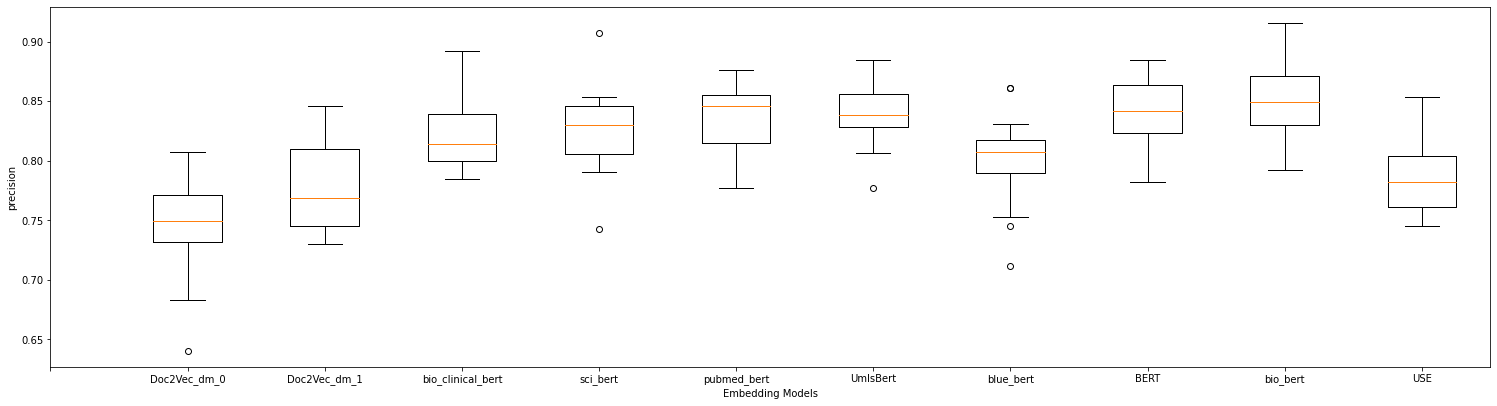

In [83]:
Models=result_Kfold.Model.unique().tolist()
data=[]
for i in Models:
  d=np.array(result_Kfold[result_Kfold['Model']==i].F_macro.tolist())
  data.append(d)

 
fig = plt.figure(figsize =(20, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)


ticks = range(len(Models)+1)
labels = [""] + Models


plt.xticks(ticks, labels)

plt.xlabel("Embedding Models")
plt.ylabel("precision")
# show plot
plt.show()

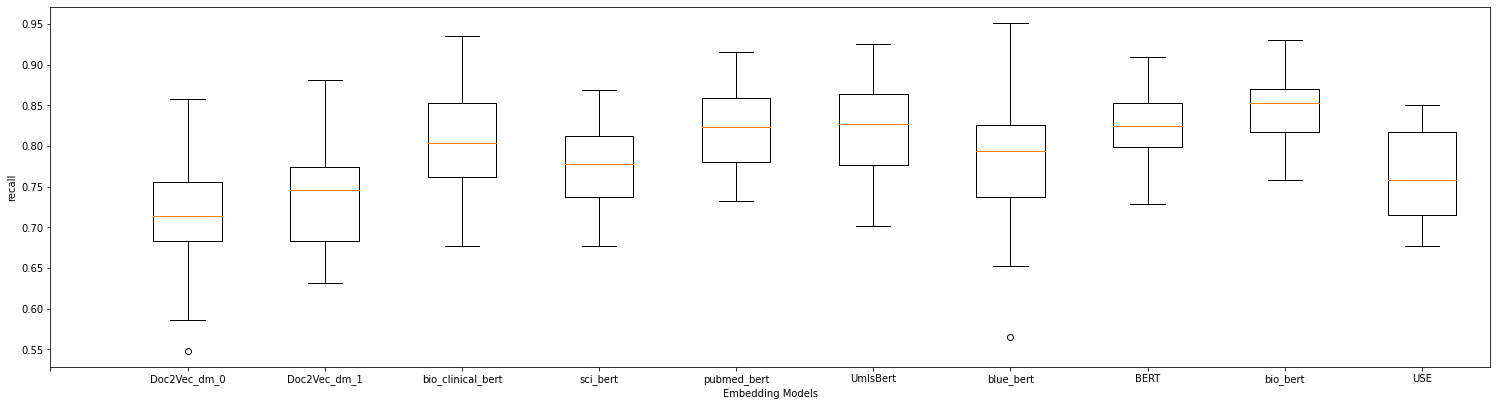

In [80]:
Models=result_Kfold.Model.unique().tolist()
data=[]
for i in Models:
  d=np.array(result_Kfold[result_Kfold['Model']==i].recall.tolist())
  data.append(d)

 
fig = plt.figure(figsize =(20, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)


ticks = range(len(Models)+1)
labels = [""] + Models


plt.xticks(ticks, labels)

plt.xlabel("Embedding Models")
plt.ylabel("recall")
# show plot
plt.show()

In [31]:
pd.DataFrame(ModelNames)

,0,1,2
0,Doc2Vec_dm_0.pkl,2 3 4 ... 1...,96 0 22 0 113 0 138 1 253 1 ...
1,Doc2Vec_dm_1.pkl,2 3 4 ... 1...,96 0 22 0 113 0 138 1 253 1 ...
2,bio_clinical_bert.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
3,sci_bert.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
4,pubmed_bert.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
5,UmlsBert.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
6,blue_bert.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
7,BERT.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
8,bio_bert.pkl,2 3 4 ... 7...,96 0 22 0 113 0 138 1 253 1 ...
9,USE.pkl,2 3 4 ... 5...,96 0 22 0 113 0 138 1 253 1 ...


In [87]:
Y

0    0
Name: Mortality, dtype: int64

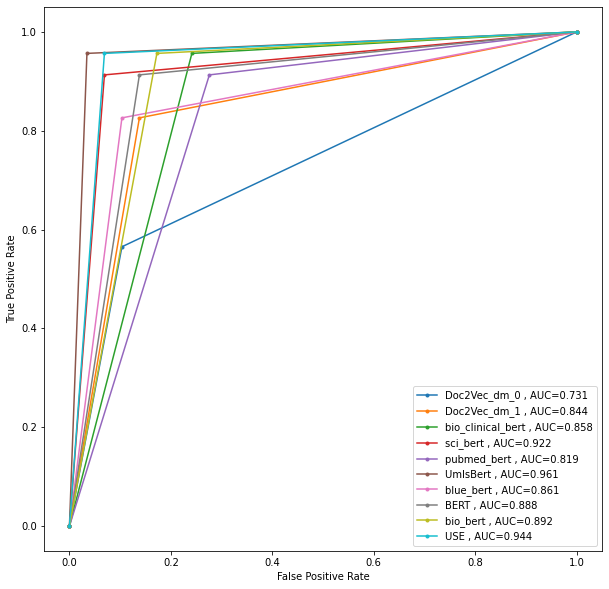

In [31]:
fig = plt.figure(figsize=(10,10))
from sklearn.model_selection import KFold
from matplotlib import pyplot

FileName=['/content/drive/MyDrive/csv/Embeddiing_Doc2Vec_dm_0_TFIDF.csv',
          'Embeddiing_Doc2Vec_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_bio_clinical_TFIDF.csv',
          'Embeddiing_sci_bert_TFIDF.csv',
          'Embeddiing_pubmed_bert_TFIDF.csv',
          'Embeddiing_UmlsBert_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_blue_bert_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_BERT_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_Bio_bert_TFIDF.csv',
          '/content/drive/MyDrive/csv/Embeddiing_USE_TFIDF.csv']
ModelNames=[]  
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['Model', 'fpr','tpr','auc'])       
seed = 7
test_size = 0.2 
ls_metric=[]  

for i in  FileName:
          df=pd.read_csv(i)   
          df.drop('Unnamed: 0', axis=1, inplace=True)
          ls=[]
          for c in range(len(df)):
                      
                tmp=[float(s) for s in df.iloc[c].embedding[1:-1].split(',')]
                tmp.insert(0,df.iloc[c].HADM_ID)
                tmp.insert(0,df.iloc[c].Model)

                ls.append([df.iloc[c].HADM_ID,  tmp ])


          tmp1=pd.DataFrame(ls,columns=["HADM_ID","Embedding"])
          data = tmp1.Embedding
          df = pd.DataFrame.from_records(data)
          su = df.rename(columns={df.columns[0]: 'Model',df.columns[1]: 'HADM_ID'})
          result = pd.merge(df_labels, su, on="HADM_ID")
          X = result.iloc[:,3:]
          Y = result.Mortality
          undersample = NearMiss(version=1, n_neighbors=3)
          X, Y = undersample.fit_resample(X, Y)
     
          X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=test_size, random_state=seed)
          model = XGBClassifier()
          model.fit(X_train, y_train)

          y_pred = model.predict(X_test)
          
          predictions = [round(value) for value in y_pred]

          precision = precision_score(y_test, predictions)
          recall = recall_score(y_test, predictions)
          F_macro=f1_score(y_test, predictions, average='macro')
          F_micro=f1_score(y_test, predictions, average='micro')
          F_weighted=f1_score(y_test, predictions, average='weighted')
          accuracy = accuracy_score(y_test, predictions)
          fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
          auc = roc_auc_score(y_test, predictions)

          Model_Name_Embedding=result.Model.unique().tolist()[0]
          ls_metric.append([Model_Name_Embedding,precision,recall,auc,(accuracy * 100.0),F_macro,F_micro,F_weighted])
          
          result_table = result_table.append({'Model':Model_Name_Embedding,
                                                              'fpr':fpr, 
                                                              'tpr':tpr, 
                                                              'auc':accuracy}, ignore_index=True)

          Model_name = Model_Name_Embedding+".pkl"
          ModelNames.append([Model_name,X_test,y_test])
                          
          pyplot.plot(fpr, tpr, marker='.', label= Model_Name_Embedding + " , AUC={:.3f}".format(auc))


          pickle.dump(model, open(Model_name, "wb"))
result_table.set_index('Model', inplace=True) 
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [27]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
tpr

array([0.        , 0.68571429, 1.        ])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


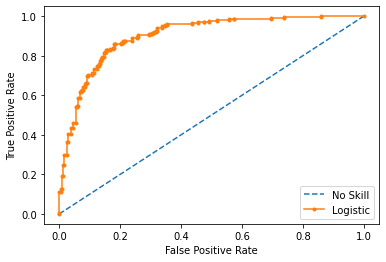

In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [22]:
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lr_fpr

array([0.        , 0.        , 0.        , 0.00416667, 0.00416667,
       0.00833333, 0.00833333, 0.0125    , 0.0125    , 0.01666667,
       0.01666667, 0.025     , 0.025     , 0.02916667, 0.02916667,
       0.0375    , 0.0375    , 0.04583333, 0.04583333, 0.05416667,
       0.05416667, 0.05833333, 0.05833333, 0.0625    , 0.0625    ,
       0.06666667, 0.06666667, 0.07083333, 0.07083333, 0.075     ,
       0.075     , 0.07916667, 0.07916667, 0.08333333, 0.08333333,
       0.0875    , 0.0875    , 0.09166667, 0.09166667, 0.09583333,
       0.09583333, 0.10833333, 0.10833333, 0.1125    , 0.1125    ,
       0.125     , 0.125     , 0.12916667, 0.12916667, 0.13333333,
       0.13333333, 0.1375    , 0.1375    , 0.14166667, 0.14166667,
       0.14583333, 0.14583333, 0.15      , 0.15      , 0.15416667,
       0.15416667, 0.15833333, 0.15833333, 0.16666667, 0.16666667,
       0.175     , 0.175     , 0.17916667, 0.17916667, 0.18333333,
       0.18333333, 0.20416667, 0.20416667, 0.20833333, 0.20833

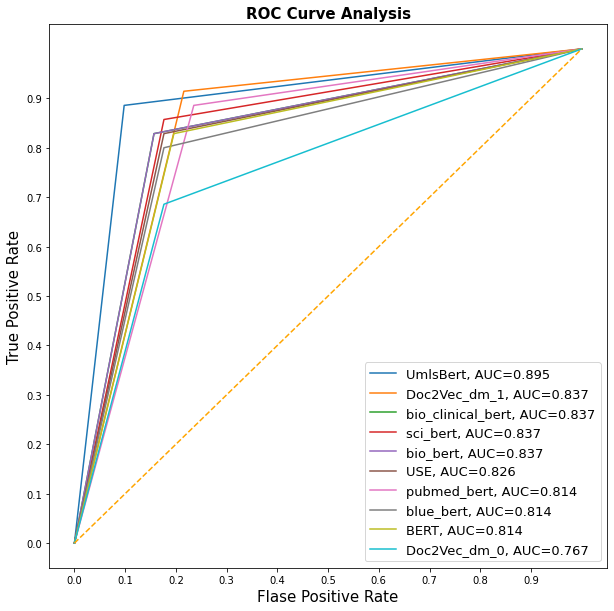

In [93]:
fig = plt.figure(figsize=(10,10))
result_table=result_table.sort_values(by='auc',ascending=False)

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()